In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tools.eval_measures import rmse, mse

In [2]:
# Read the CSV file
df = pd.read_csv("X:/research paper-implementation/PJMW_hourly_diff_arima.csv")

In [3]:
df

,Datetime,PJMW_MW,hour,day_of_week,month,PJMW_MW_diff
0,2002-04-01 02:00:00,4306.0,2,0,4,-68.0
1,2002-04-01 03:00:00,4322.0,3,0,4,16.0
2,2002-04-01 04:00:00,4359.0,4,0,4,37.0
3,2002-04-01 05:00:00,4436.0,5,0,4,77.0
4,2002-04-01 06:00:00,4723.0,6,0,4,287.0
...,...,...,...,...,...,...
143230,2018-08-02 20:00:00,6545.0,20,3,8,-148.0
143231,2018-08-02 21:00:00,6496.0,21,3,8,-49.0
143232,2018-08-02 22:00:00,6325.0,22,3,8,-171.0
143233,2018-08-02 23:00:00,5892.0,23,3,8,-433.0


In [4]:
# Fit the ARIMA model
model = ARIMA(df['PJMW_MW_diff'], order=(1, 0, 0))  # Adjust the order as needed
model_fit = model.fit()

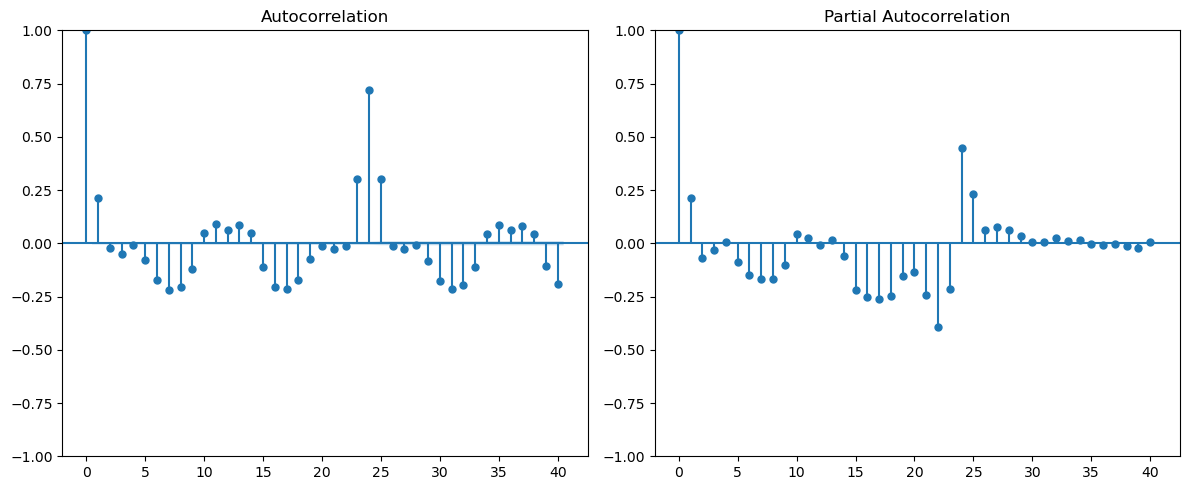

In [5]:
# 2. Plot ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(model_fit.resid, lags=40, ax=ax[0])
plot_pacf(model_fit.resid, lags=40, ax=ax[1])
plt.tight_layout()
plt.show()


In [6]:
# 3. Calculate metrics - CORRECTED VERSION
# Get predictions for training data
train_predictions = model_fit.predict(start=df.index[0], end=df.index[-1])

In [7]:
# Calculate metrics using actual vs predicted values
from sklearn.metrics import r2_score
actual_values = df['PJMW_MW_diff']
mae = np.mean(np.abs(actual_values - train_predictions))
rmse_value = rmse(actual_values, train_predictions)
mse_value = mse(actual_values, train_predictions)
ssq = np.sum((actual_values - train_predictions) ** 2)
tss = np.sum((actual_values - np.mean(actual_values)) ** 2)
r_squared = 1 - (ssq / tss)

In [8]:
# Get AIC and BIC directly from model
aic_value = model_fit.aic
bic_value = model_fit.bic

In [17]:
# 4. Print the metrics
print(f"R-squared: {r_squared:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse_value:.4f}")
#print(f"MSE: {mse_value:.4f}")
#print(f"AIC: {aic_value:.2f}")
#print(f"BIC: {bic_value:.2f}")
# mean absolute percentage error



R-squared: 0.5994
MAE: 101.6137
RMSE: 139.4445


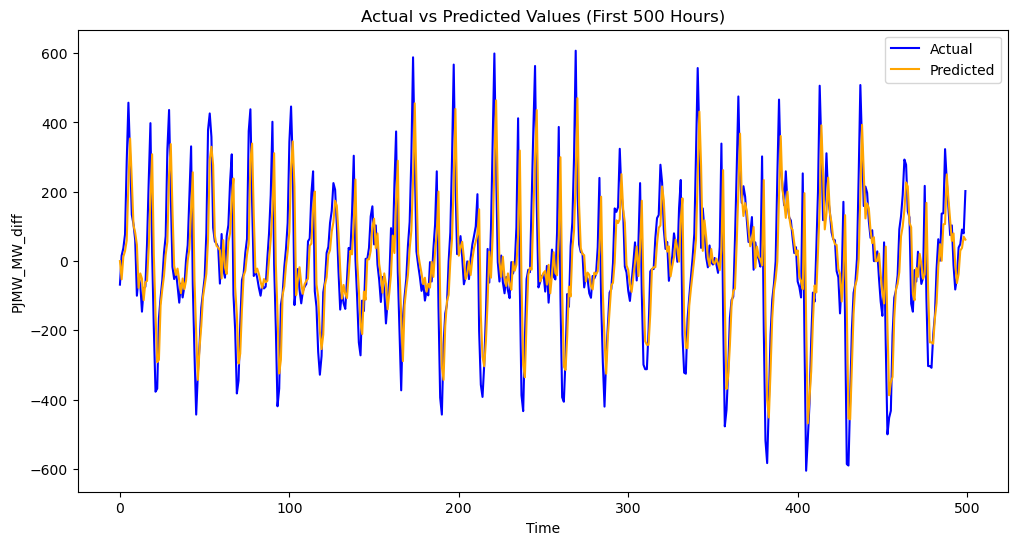

In [11]:
# Plot the actual vs predicted values for the first 500 hours
plt.figure(figsize=(12, 6))
plt.plot(df.index[:500], actual_values[:500], label='Actual', color='blue')
plt.plot(df.index[:500], train_predictions[:500], label='Predicted', color='orange')
plt.title('Actual vs Predicted Values (First 500 Hours)')
plt.xlabel('Time')
plt.ylabel('PJMW_MW_diff')
plt.legend()
plt.show()



In [22]:
# 5. Additional diagnostic information
print("\nModel Summary:")
print(model_fit.summary())


Model Summary:
                               SARIMAX Results                                
Dep. Variable:           PJMW_MW_diff   No. Observations:               143235
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -910487.612
Date:                Tue, 05 Aug 2025   AIC                        1820981.224
Time:                        16:57:20   BIC                        1821010.840
Sample:                             0   HQIC                       1820990.069
                             - 143235                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0078      1.641      0.005      0.996      -3.209       3.224
ar.L1          0.7742      0.001    873.962      0.000       0.772       0.776
sigma2      1.944e+04     21.671    